# Numerical simulation of the coarsening model
The following Jupyter notebook allows to run the numerical simulation for the paper 'Coarsening model of chromosomal crossover placement' by Marcel Ernst, Riccardo Rossetto and David Zwicker, published in https://journals.aps.org/prxlife/accepted/10.1103/8jrt-rb28

We have three different models implemented
(i) The full HEI10 coarsening model that includes the nucleoplasm, the Synaptonemal Complex (SC) and the droplets.
(ii) The simple coarsening model that only considers the Synaptonemal Complex and the droplets.
(iii) The coarsening model with abolished Synaptonemal complex where droplets are only exchanging HEI10 via the surrounding nucleoplasm.

### Full Coarsening model

Simulated are full cells with multiple SCs, including nucleoplasmic exchange. The state variables of the system are the HEI10 concentration in the nucleoplasm `m_n`, the HEI10 concentration along the SC `m_sc`, which is divided by a grid, and the droplets of size `m_d` (and position `x_d`).

First, define parameters of full model, based on non-dimensional model in the SI 2.A.1

In [1]:
import Coarsening_model as cm
import numpy as np

In [2]:
t_log = np.sort(np.concatenate((np.array([0]), 10 ** np.arange(-1.0, 8.01, 0.1))))
param = dict(nu=1/3,  # Size-dependency of HEI10 affinity to droplets
             nu_ds=0,  # Size-dependency of exchanges between droplets and SC
             nu_dn=1/3,  # Size-dependency of exchanges between droplets and nucleoplasm
             phi_d=1e-4,  # Affinity ratio between droplets and SC
             phi_n=1e-1,  # Affinity ratio between nucleoplasm and SC
             gamma_ds=1.0,  # Non-dimensional exchange rate between droplets and SC
             gamma_dn=1e-2,  # Non-dimensional exchange rate between droplets and nucleoplasm
             gamma_sn=1e-4,  # Non-dimensional exchange rate between SC and nucleoplasm
             list_l_sc=np.array([100, 200, 300]),  # Length of SCs in the cell
             m_tot=6,  # Total amount of HEI10 in the cell
             m_d_init_mean=1e-3,  # Average initial droplet size
             m_d_init_sd=1e-2,  # Standard deviation of initial droplet size
             droplet_density=1.0,  # Density of initial droplets along the SC
             grid_density=0.5,  # Grid cell density along SC for simulation
             t_log=t_log,  # List of times to log the system state
             dt_init=1e-3,  # Initial time-step
             tol=1e-6,  # Tolerance for adaptive-time-stepping
             sample_size=2)  # Sample Size

Initialize the Coarsening model with randomized initial conditions

In [3]:
sim1 = cm.FullCoarseningModel(param)

Next, have a look at the initial conditions (Nucleoplasm, SC, droplets)
- `sim1.m_n`: Non-dimensional HEI10 concentration in the nucleoplasm, ( Sample index )
- `sim1.m_sc`: Non-dimensional HEI10 concentration along each SC, ( Sample index ) x ( SC index ) x ( SC cell index )
- `sim1.m_d`: Non-dimensional droplet sizes, ( Sample index ) x ( SC index ) x ( Droplet index )
- `sim1.x_d`: Initial position the droplets along each SC, ( Time step index ) x ( Sample index ) x ( SC index ) x ( Droplet index )

In [4]:
print('nucleoplasm ', sim1.m_n[0])  # HEI10 concentration in nucleoplasm (first sample).
print('SC ', sim1.m_sc[0, 0, :5])  # HEI10 concentration of the first 5 cells (first SC, first sample).
print('Droplet sizes ', sim1.m_d[0, 0, :5])  # Initial droplet sizes of the first 5 droplets.
print('Droplet positions ', sim1.x_d[0, 0, :5])  # Droplet positions of the first 5 droplets.

nucleoplasm  0.08852459016393444
SC  [0.00885246 0.00885246 0.00885246 0.00885246 0.00885246]
Droplet sizes  [0.00098912 0.00098904 0.00099722 0.00100489 0.00100509]
Droplet positions  [19.4524061  43.97268574 44.17224458 69.93620526 63.26491608]


Evolve the system (will take several minutes)

In [5]:
results = sim1.evolve()

runtime:  0:03:19.734092


The logged state variables for each time in `t_log` are now stored in the dictionary `results = sim1.results`

- `results['m_n_log']` Time-development of the non-dimensional HEI10 concentration in the nucleoplasm, ( Time step index ) x ( Sample index )
- `results['m_sc_log']` Time-development of the non-dimensional HEI10 concentration along each SC, ( Time step index ) x ( Sample index ) x ( SC index ) x ( SC cell index )
- `results['m_d_log']` Time-development of the non-dimensional droplet sizes, ( Time step index ) x ( Sample index ) x ( SC index ) x ( Droplet index )
- `results['x_d']` Initial position the droplets along each SC, ( Time step index ) x ( Sample index ) x ( SC index ) x ( Droplet index )
- `results['n_d_log']` Time-development of the number of remaining droplets (with droplet size >0) for each SC, ( Time step index ) x ( Sample index ) x ( SC index )

Plot the time development of the average state variables, as well as the number of droplets.

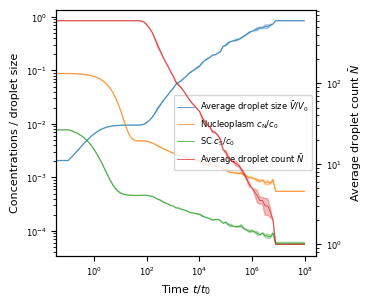

In [6]:
%matplotlib inline
cm.plot_time_development(results)

### Simple Coarsening model without nucleoplasm

Simulated is one SC, since all SCs exhibit independent behaviour.
The state variables of the system are the HEI10 concentration along the SC `m_sc`, which is divided by a grid, and the droplets of size `m_d` (and position `x_d`).

First, define parameters of full model, based on non-dimensional model in the SI 2.A.1

In [7]:
import Coarsening_without_nucleoplasm as cm2
import numpy as np

In [8]:
t_log = np.sort(np.concatenate((np.array([0]), 10 ** np.arange(-1.0, 8.01, 0.1))))

# Define parameters of simple coarsening model without nucleoplasm, based on non-dimensional model in S2.A.1
param = dict(nu=1/3,  # Size-dependency of HEI10 affinity to droplets
             nu_ds=0,  # Size-dependency of exchanges between droplets and SC
             phi_d=1e-4,  # Affinity ratio between droplets and SC
             gamma_ds=1.0,  # Non-dimensional exchange rate between droplets and SC
             l_sc=250,  # Length of SC
             m_tot=3,  # Total amount of HEI10 in the cell
             m_d_init_mean=1e-3,  # Average initial droplet size
             m_d_init_sd=1e-2,  # Standard deviation of initial droplet size
             droplet_density=1.0,  # Density of initial droplets along the SC
             grid_density=0.5,  # Grid cell density along SC for simulation
             t_log=t_log,  # List of times to log the system state
             dt_init=1e-3,  # Initial time-step
             tol=1e-6,  # Tolerance for adaptive-time-stepping
             sample_size=5)  # Sample Size

Initialize the Coarsening model with randomized initial conditions

In [9]:
sim2 = cm2.SimpleCoarseningModel(param)

Next, have a look at the initial conditions (SC, droplets)
- `sim1.m_sc`: Non-dimensional HEI10 concentration along each SC, ( Sample index ) x ( SC cell index )
- `sim1.m_d`: Non-dimensional droplet sizes, ( Sample index ) x ( Droplet index )
- `sim1.x_d`: Initial position the droplets along each SC, ( Time step index ) x ( Sample index ) x ( Droplet index )

Evolve the system (will take several minutes)

In [10]:
results2 = sim2.evolve()

runtime:  0:04:19.689964


The logged state variables for each time in `t_log` are now stored in the dictionary `results = sim2.results`

- `results['m_sc_log']`: Time-development of the non-dimensional HEI10 concentration along each SC, ( Time step index ) x ( Sample index ) x ( SC cell index )
- `results['m_d_log']`: Time-development of the non-dimensional droplet sizes, ( Time step index ) x ( Sample index ) x ( Droplet index )
- `results['x_d']`: Initial position the droplets along each SC, ( Time step index ) x ( Sample index ) x ( Droplet index )
- `results['n_d_log']`: Time-development of the number of remaining droplets (with droplet size >0), for each SC, ( Time step index ) x ( Sample index )

Plot the time development of the average state variables, as well as the number of droplets.

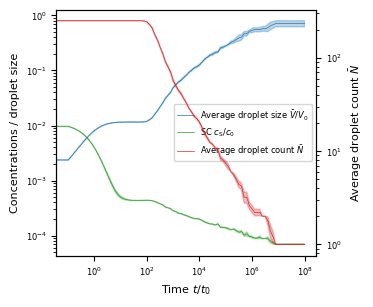

In [11]:
%matplotlib inline
cm2.plot_time_development(results2)

### Simple Coarsening model without SC

Simulated is the nucleoplasm and droplets resembling the zyp1-mutant in Arabidopsis.
The state variables of the system are the HEI10 concentration in the nucleoplasm `m_n`, and the droplet sizes `m_d`. Since the allocation of droplets to SCs and the positions are not affecting the time-development, they are not simulated.

First, define parameters of full model, based on non-dimensional model in the SI 2.A.2

In [15]:
import Coarsening_without_SC as cm3
import numpy as np

In [16]:
t_log = np.sort(np.concatenate((np.array([0]), 10 ** np.arange(-1.0, 4.01, 0.1))))
# Define parameters of model for system without SC, based on non-dimensional model in S2.A.2
param = dict(nu=1/3,  # Size-dependency of HEI10 affinity to droplets
             nu_dn=1/3,  # Size-dependency of exchanges between droplets and nucleoplasm
             phi_d=1e-2,  # Affinity ratio between droplets and nucleoplasm
             m_tot=5,  # Total amount of HEI10 in the cell
             n_d_init=400,  # Number of initial droplets
             m_d_init_mean=1e-3,  # Average initial droplet size
             m_d_init_sd=1e-2,  # Standard deviation of initial droplet size
             t_log=t_log,  # List of times to log the system state
             dt_init=1e-3,  # Initial time-step
             tol=1e-6,  # Tolerance for adaptive-time-stepping
             sample_size=5)  # Sample Size

Initialize the Coarsening model with randomized initial conditions

In [17]:
sim3 = cm3.CoarseningWithoutSC(param)

Next, have a look at the initial conditions (Nucleoplasm, droplets)

- `sim1.m_n`: Non-dimensional HEI10 concentration in the nucleoplasm, ( Sample index )
- `sim1.m_d`: Non-dimensional droplet sizes, ( Sample index ) x ( Droplet index )
- `sim1.x_d`: Initial position the droplets along each SC, ( Time step index ) x ( Sample index ) x ( Droplet index )

Evolve the system (will take several minutes)

In [18]:
results3 = sim3.evolve()

runtime:  0:04:01.607292


The logged state variables for each time in `t_log` are now stored in the dictionary `results = sim3.results`

- `results['m_n_log']`: Time-development of the non-dimensional HEI10 concentration in the nucleoplasm, ( Time step index ) x ( Sample index )
- `results['m_d_log']`: Time-development of the non-dimensional droplet sizes, ( Time step index ) x ( Sample index )  x ( Droplet index )
- `results['x_d']`: Initial position the droplets along each SC, ( Time step index ) x ( Sample index ) x ( Droplet index )
- `results['n_d_log']`: Time-development of the number of remaining droplets (with droplet size >0), for each SC, ( Time step index ) x ( Sample index )

Plot the time development of the average state variables, as well as the number of droplets.

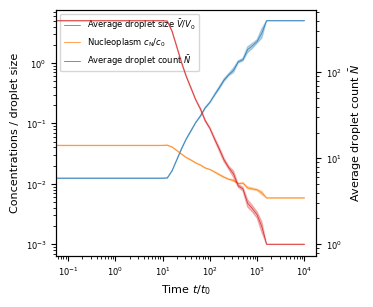

In [19]:
%matplotlib inline
cm3.plot_time_development(results3)